In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect('workshop.db')

## Weekly matches

In [3]:
df = pd.read_sql_query('''SELECT 
    date(datetime(json_extract(MatchInfo, '$.StartTime'), 'localtime', 'weekday 0', '-6 days')) AS WeekStartDate,
    COUNT(*) AS MatchCount
FROM MatchStats
WHERE 
    datetime(json_extract(MatchInfo, '$.StartTime'), 'localtime') > '2023-06-20 11:00:00' 
    AND json_extract(MatchInfo, '$.LifecycleMode') = 3
    AND EXISTS (
        SELECT 1
        FROM json_each(Players) AS player
        WHERE json_extract(player.value, '$.PlayerId') = 'xuid(2533274855333605)'
    )
GROUP BY WeekStartDate
ORDER BY WeekStartDate;''', conn)

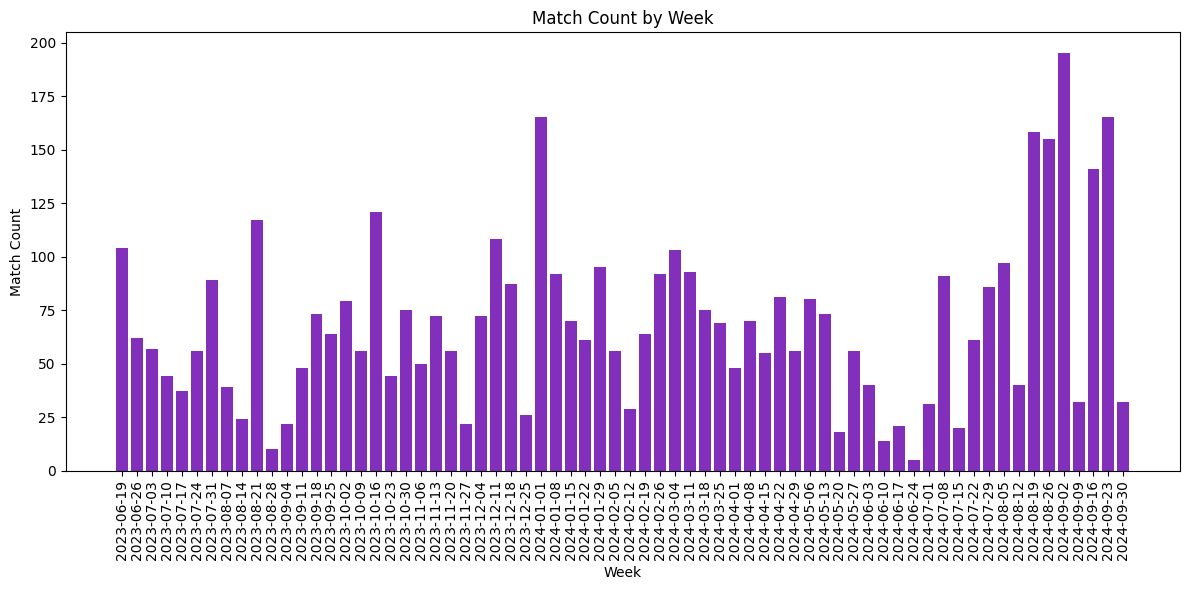

In [4]:
plt.figure(figsize=(12, 6))
plt.bar(df['WeekStartDate'], df['MatchCount'], color='#822fbb')
plt.xlabel('Week')
plt.ylabel('Match Count')
plt.title('Match Count by Week')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout to make room for x-axis labels

# Show the chart
plt.show()

## Monthly matches

In [9]:
df = pd.read_sql_query('''SELECT 
    strftime('%Y-%m', datetime(json_extract(MatchInfo, '$.StartTime'), 'localtime')) AS YearMonth,
    COUNT(*) AS MatchCount
FROM MatchStats
WHERE 
    datetime(json_extract(MatchInfo, '$.StartTime'), 'localtime') > '2023-06-20 11:00:00' 
    AND json_extract(MatchInfo, '$.LifecycleMode') = 3
    AND EXISTS (
        SELECT 1
        FROM json_each(Players) AS player
        WHERE json_extract(player.value, '$.PlayerId') = 'xuid(2533274855333605)'
    )
GROUP BY YearMonth
ORDER BY YearMonth;
''', conn)

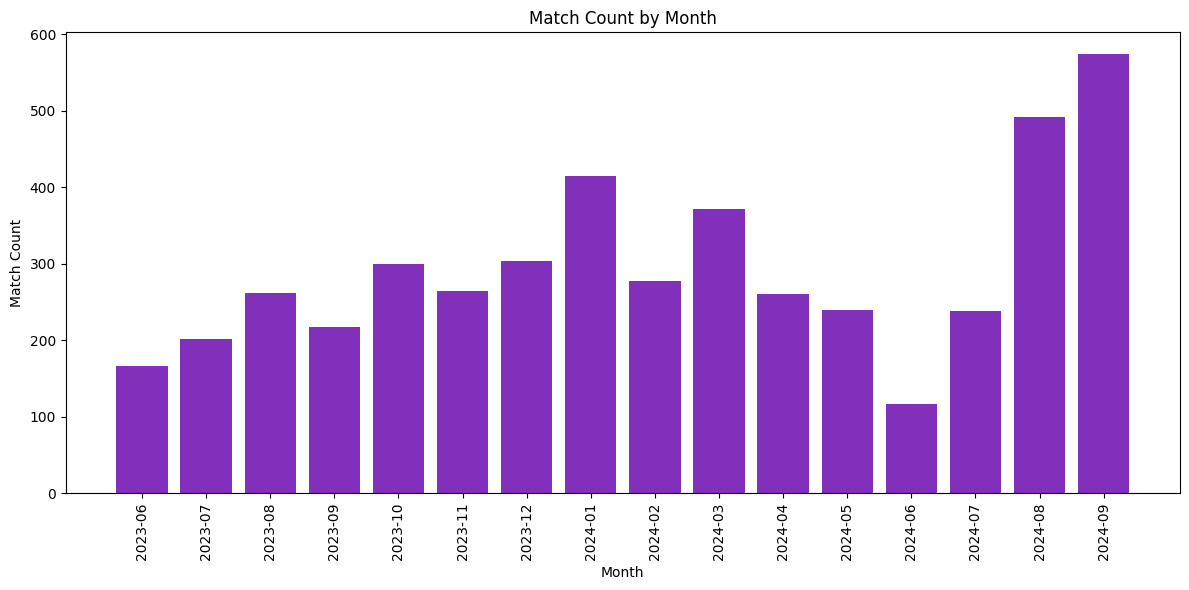

In [10]:
plt.figure(figsize=(12, 6))
plt.bar(df['YearMonth'], df['MatchCount'], color='#822fbb')
plt.xlabel('Month')
plt.ylabel('Match Count')
plt.title('Match Count by Month')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout to make room for x-axis labels

# Show the chart
plt.show()